# Proxy Composites

In this tutorial, we introduce how to generate composites of proxies with `cfr`.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd
import numpy as np

## Load the PAGES2k network stored in a pandas `DataFrame`

In [2]:
df = pd.read_pickle('./data/pages2k_dataset.pkl')
df.columns

Index(['paleoData_pages2kID', 'dataSetName', 'archiveType', 'geo_meanElev',
       'geo_meanLat', 'geo_meanLon', 'year', 'yearUnits',
       'paleoData_variableName', 'paleoData_units', 'paleoData_values',
       'paleoData_proxy'],
      dtype='object')

## Create a `ProxyDatabase` and load from the pandas `DataFrame`

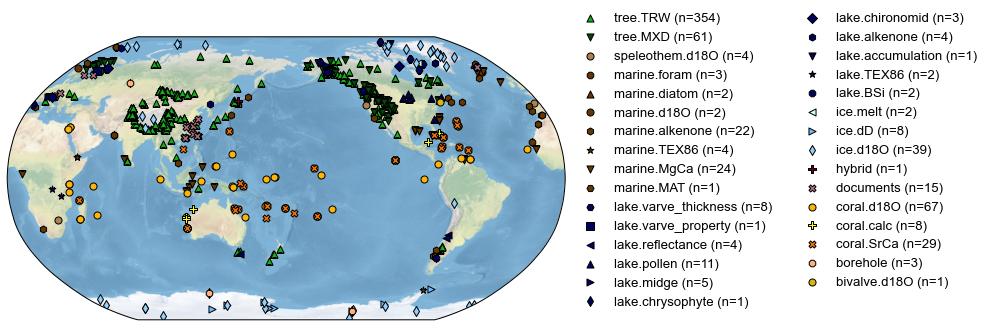

In [3]:
pdb = cfr.ProxyDatabase().from_df(df)
fig, ax = pdb.plot()

## Create composites for each proxy type

We take corals as an example.

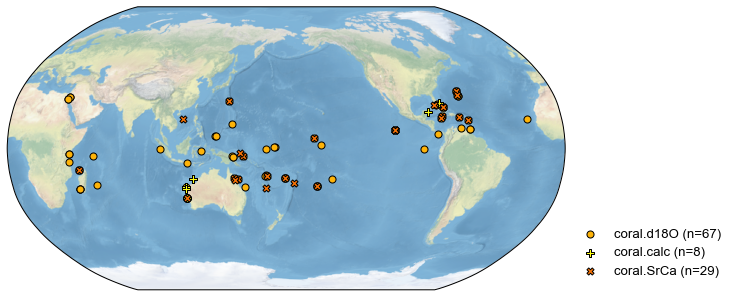

In [4]:
pdb_corals = pdb.filter(by='ptype', keys='coral')
fig, ax = pdb_corals.plot()

### Without calibration to an instrumental target

In [16]:
pdb_corals.make_composite(bin_width=10)

Analyzing ProxyRecord:   0%|          | 0/104 [00:00<?, ?it/s]/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/nump

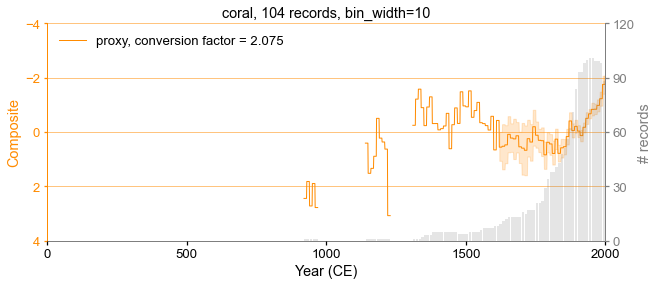

In [6]:
fig, ax = pdb_corals.plot_composite(left_ylim=[4, -4])

### With calibration to an instrumental target

We load instrumental temperature observations as a target for scaling the proxy values.

In [7]:
# check the variable and dimension names
import xarray as xr

ds = xr.open_dataset('./data/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc')
ds

<xarray.Dataset>
Dimensions:           (time: 2052, latitude: 36, longitude: 72, bnds: 2)
Coordinates:
  * time              (time) datetime64[ns] 1850-01-16T12:00:00 ... 2020-12-1...
  * latitude          (latitude) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude         (longitude) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
    realization       int64 ...
Dimensions without coordinates: bnds
Data variables:
    tas_mean          (time, latitude, longitude) float64 ...
    time_bnds         (time, bnds) datetime64[ns] ...
    latitude_bnds     (latitude, bnds) float64 ...
    longitude_bnds    (longitude, bnds) float64 ...
    realization_bnds  (bnds) int64 ...
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H...
    source:       CRUTEM.5.0.1.0 HadSST.4.0.0.0
    title:        HadCRUT.5.0.1.0 blended land air temperature and sea-surfac...
    version:      HadCRUT.5.0.1.0
    Conventions:  CF-1.7

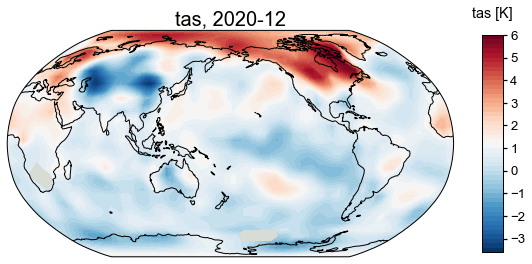

In [8]:
obs = cfr.ClimateField().load_nc(
    './data/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc',
    vn='tas_mean', lat_name='latitude', lon_name='longitude',
)
obs = obs.rename('tas')
fig, ax = obs.plot(it=-1)

In [9]:
pdb_corals.make_composite(obs, bin_width=10)

Analyzing ProxyRecord:  14%|█▍        | 15/104 [00:00<00:01, 49.67it/s]/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Analyzing ProxyRecord:  35%|███▍      | 36/104 [00:00<00:01, 63.17it/s]/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean

In [10]:
# Check the composite infomation:

print('proxy_comp:\n', pdb_corals.composite['proxy_comp'].index)
print('proxy_num:\n', pdb_corals.composite['proxy_num'])
print('df_obs:\n', pdb_corals.composite['df_obs'])
print('slope:\n', pdb_corals.composite['slope'])
print('intercept:\n', pdb_corals.composite['intercept'])

proxy_comp:
 Float64Index([ 925.0,  935.0,  945.0,  955.0,  965.0,  975.0,  985.0,  995.0,
              1005.0, 1015.0,
              ...
              1925.0, 1935.0, 1945.0, 1955.0, 1965.0, 1975.0, 1985.0, 1995.0,
              2005.0, 2015.0],
             dtype='float64', length=110)
proxy_num:
 [  1.   1.   1.   1.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   1.
   2.   3.   3.   3.   5.   5.   5.   5.   5.   5.   5.   5.   5.   4.
   4.   4.   4.   5.   5.   5.   5.   6.   7.   7.   7.   7.   8.   8.
   9.  11.  12.  13.  13.  13.  13.  13.  16.  15.  17.  17.  17.  21.
  21.  22.  29.  34.  38.  38.  41.  43.  48.  51.  56.  62.  71.  84.
  93.  93.  98. 100. 101. 101.  99.  99.  98.  88.  26.   8.]
df_obs:
          Ocn_065   Ocn_075   Ocn_078   Ocn_167   Ocn_091   Ocn_093   Ocn_096  \
1855.0       NaN       NaN       NaN -0.205589    

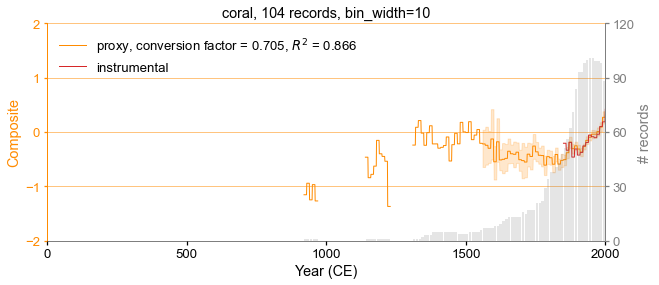

Figure saved at: "figs/coral_composites.pdf"


In [11]:
fig, ax = pdb_corals.plot_composite()
cfr.showfig(fig)
cfr.savefig(fig, './figs/coral_composites.pdf')

## The composite of ice core records

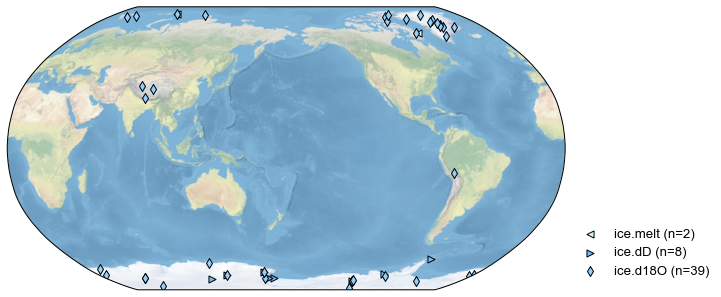

In [12]:
pdb_ice = pdb.filter(by='ptype', keys='ice')
fig, ax = pdb_ice.plot()

In [13]:
pdb_ice.make_composite(
    obs_nc_path='./data/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc',
    vn='tas_mean',
    lat_name='latitude', lon_name='longitude',
    bin_width=10,
)

Analyzing ProxyRecord:  18%|█▊        | 9/49 [00:01<00:07,  5.16it/s]/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Analyzing ProxyRecord:  43%|████▎     | 21/49 [00:04<00:05,  5.18it/s]/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Analyzing ProxyRecord:  63%|██████▎   | 31/49 [00:06<00:03,  5.03it/s]/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/functi

In [14]:
# Check the composite infomation:

print('proxy_comp:\n', pdb_ice.composite['proxy_comp'].index)
print('proxy_num:\n', pdb_ice.composite['proxy_num'])
print('df_obs:\n', pdb_ice.composite['df_obs'])
print('slope:\n', pdb_ice.composite['slope'])
print('intercept:\n', pdb_ice.composite['intercept'])

proxy_comp:
 Float64Index([ -45.0,  -35.0,  -25.0,  -15.0,   -5.0,    5.0,   15.0,   25.0,
                35.0,   45.0,
              ...
              1925.0, 1935.0, 1945.0, 1955.0, 1965.0, 1975.0, 1985.0, 1995.0,
              2005.0, 2015.0],
             dtype='float64', length=207)
proxy_num:
 [ 2.  2.  3.  3.  3. 18. 16. 13. 18. 14. 17. 16. 14. 18. 13. 18. 14. 16.
 17. 14. 19. 16. 18. 21. 17. 21. 16. 20. 22. 17. 22. 18. 20. 21. 18. 22.
 18. 19. 22. 18. 22. 17. 20. 22. 18. 22. 19. 19. 23. 19. 22. 21. 19. 23.
 20. 21. 21. 18. 23. 21. 24. 20. 22. 24. 19. 24. 22. 20. 24. 22. 22. 22.
 21. 22. 23. 25. 20. 23. 25. 20. 25. 23. 22. 27. 25. 24. 26. 25. 26. 26.
 28. 26. 24. 29. 27. 28. 28. 28. 28. 28. 29. 26. 28. 30. 26. 33. 31. 28.
 33. 31. 33. 29. 30. 33. 30. 31. 30. 31. 32. 30. 34. 31. 30. 34. 32. 34.
 29. 34. 37. 34. 38. 35. 34. 38. 36. 38. 36. 34. 38. 36. 38. 34. 36. 38.
 37. 37. 39. 39. 41. 39. 40. 40. 41. 42. 39. 43. 41. 41. 44. 40. 44. 42.
 41. 42. 43. 45. 43. 43. 45. 41. 45. 44. 

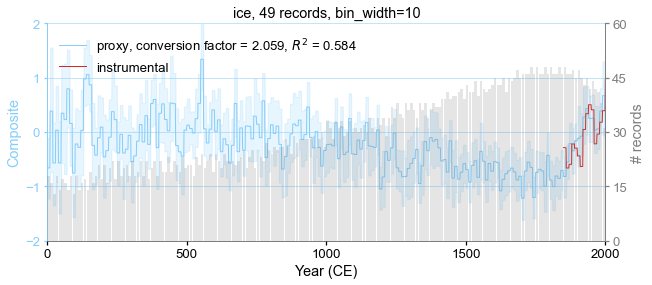

Figure saved at: "figs/ice_composite.pdf"


In [15]:
fig, ax = pdb_ice.plot_composite()
cfr.showfig(fig)
cfr.savefig(fig, './figs/ice_composite.pdf')